In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *


#Check file
#import sys
#sys.path.insert(0, '/home/jovyan/exercises_levels/Gates_and_Circuits/Single Qubit Gates/Level_2_Single_Qubit_Gates')
#from Check_level_2_gates import *
#import warnings
#warnings.filterwarnings('ignore')

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-04-26 13:19:23,148: Credentials are already in use. The existing account in the session will be replaced.


## Gates as rotations

By now we have seen the set of gates and their impact on our state on the bloch sphere. The next steps are to actually quantized the impact of the gates and describe them as actually rotations, given by the angles $\theta, \phi$. This leads us at the end to a more general description of a single qubit gate: `u3`. <img src='bloch_sphere.png' width="200">

It can be shown that the most general form of a single qubit gate can be written as:
$$
U (\theta, \phi, \lambda)= \begin{pmatrix}
 \cos(\theta/2) & -e^{j\lambda} \sin(\theta/2)\\
 e^{j\phi}\sin(\theta/2) & e^{j(\lambda+ \phi)} \cos(\theta/2)
\end{pmatrix}
$$
In the next couple of exercises we will go over the different choices for the parameters $\lambda, \phi$ and $\theta$ to compose arbitrary single qubit gates.


<b> 1.) Singles gated as rotations </b>

We start by considering our favourtie Pauli-gates as rotations around the bloch sphere:

$$
X=\begin{pmatrix}
 0 & 1\\
 1 & 0
\end{pmatrix}
$$

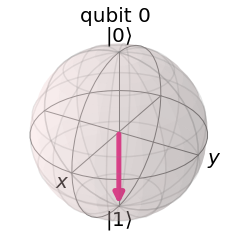

In [8]:
## X-gate

# FILL IN YOUR CODE HERE
# Keep theta<=np.pi

# Initialize Circuit

qc_x = QuantumCircuit(1)

# for theta=np.pi/2 we get a cos(theta/2) = 0 and sin(theta/2) = 1 and we need no extra phases so phi = lambda = 0

qc_x.u(np.pi, 0, 0, 0)

# simulation = Aer.get_backend('aer_simulator')
# qc_x.save_statevector()
# out_vector = simulation.run(qc_x).result().get_statevector()
# plot_bloch_multivector(out_vector)

state = Statevector.from_instruction(qc_x)
plot_bloch_multivector(state)


#ex1_validation([theta, phi, lam])

$$
Z=\begin{pmatrix}
 1 & 0\\
0 & -1
\end{pmatrix}
$$

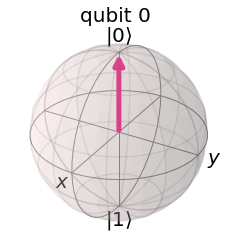

In [9]:
## Z-gate

# FILL IN YOUR CODE HERE

# Initialize Circuit
qc_z = QuantumCircuit(1)

# for for theta= 0 we get a cos(theta/2) = 1 and sin(theta/2) = 0
# need an additional phase of -1 in the |11> element, therefore: phi + lambda must be pi, can choose both angles freely obeying this condition
# choose here both to be np.pi/2
qc_z.u(0, np.pi/2, np.pi/2, 0)
state = Statevector.from_instruction(qc_z)
plot_bloch_multivector(state)

# ex2_validation([theta, phi,lam])

$$
Y=\begin{pmatrix}
 0 & -i\\
i & 0
\end{pmatrix}
$$

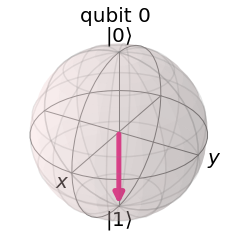

In [10]:
## Y-gate

# FILL IN YOUR CODE HERE

# initialize circuit
qc_y = QuantumCircuit(1)

# theta = np.pi, want a phase of i in |01> and |10> so choose phi and lambda = pi/2
qc_y.u(np.pi, np.pi/2, np.pi/2, 0)
# vizualize action on |00> state
state = Statevector.from_instruction(qc_y)
plot_bloch_multivector(state)

# ex3_validation([theta, phi,lam])

$$
H= \frac {1}{\sqrt{2}}\begin{pmatrix}
 1 & 1\\
1 & -1
\end{pmatrix}
$$

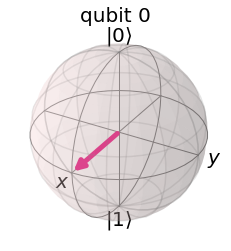

In [13]:
## Hadamard 

# FILL IN YOUR CODE HERE

# initialize circuit
qc_h = QuantumCircuit(1)

# hadamard gate is a x + z gate: get the prefactor 1/Sqrt(2) by choosing theta = np.pi/2
# to get the correct pahses we want to have in phi + lambda = 1 and but no additional pahses introduced for |01> and |10>
# choose therefore phi = 0 and theta = pi

qc_h.u(np.pi/2, 0, np.pi, 0)

# plot state on blochsphere
state = Statevector.from_instruction(qc_h)
plot_bloch_multivector(state)

# ex4_validation([theta, phi, lam])

<b> 2.) Multiple gates as rotations 

We now saw how we can write the $X,Y,Z, H$ gates as rotations about the bloch sphere, this holds for all other single qubit gates as well. We can now ofcourse concatenate the rotations and combine a whole set of single qubit gates into a single rotations. 

(hint: take $\lambda$=0)

In [19]:
## Which rotation corresponds to the gate set H-Y-S-T ?

#Circuit:
qc=QuantumCircuit(1)
qc.h(0)
qc.y(0)
qc.s(0)
qc.t(0)

##FILL IN YOUR ANSWER HERE
state1 = Statevector.from_instruction(qc)
print(state1)

# Decompose gates in rotations from above and calculate manually with the matrices the resulting matrix
# this gives equations to determine the angles, it follows that:
theta = np.pi/2
phi = -np.pi/4
lam = 0  # hint!


#Check the result with the u3 rotation gate (arbitrary single qubit rotations)
qc2=QuantumCircuit(1)
qc2.u(theta,phi,lam,0)  # changed to u, as u3 not used anymore

state2 = Statevector.from_instruction(qc2)
print(state2)
# both states are the same except a global phase of e^(i * 3pi/2), so by multiplying state2 with this phase one gets state1 

#ex5_validation(qc2)

Statevector([ 0. -0.70710678j, -0.5-0.5j       ],
            dims=(2,))
Statevector([0.70710678+0.j , 0.5       -0.5j],
            dims=(2,))
False
